# Imports

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical, set_random_seed
print(tf.__version__)

2.18.0


In [3]:
import sklearn
from sklearn.model_selection import train_test_split
print(sklearn.__version__)

1.6.1


In [4]:
import matplotlib
import matplotlib.pyplot as plt
print(matplotlib.__version__)

3.10.0


In [5]:
import random
import numpy as np
print(np.__version__)

1.26.4


In [6]:
random.seed(42)
np.random.seed(42)
tf.keras.utils.set_random_seed(42)

# Loading and processing the data

- [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

In [7]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [8]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [11]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
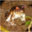

In [12]:
X_train[0]

In [13]:
X_train.min(), X_train.max() # RGB

(0, 255)

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [19]:
X_train[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [16]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [20]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [22]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [23]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

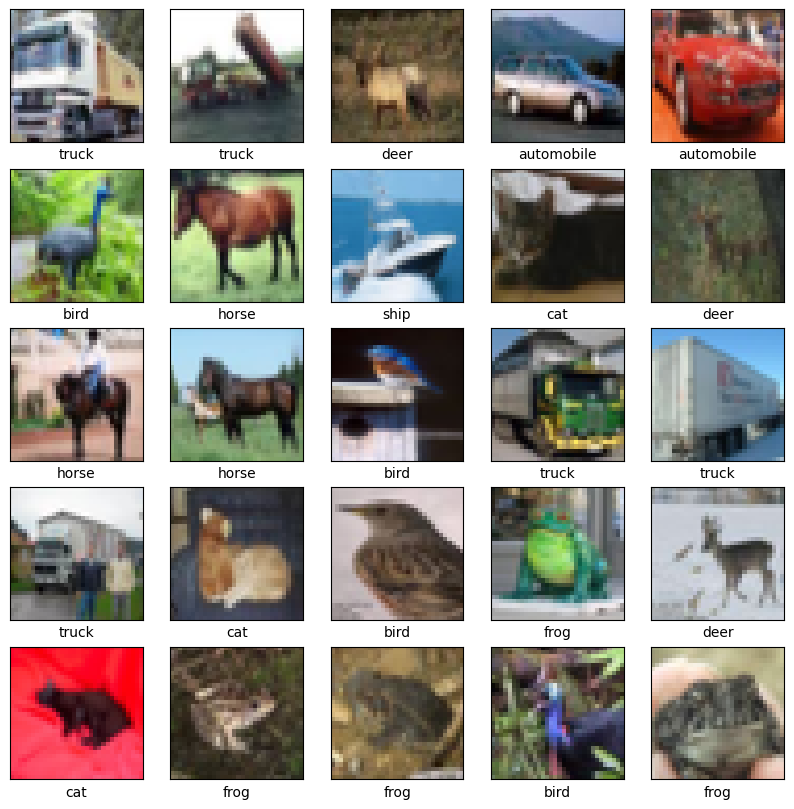

In [28]:
plt.figure(figsize=(10,10))
for i in range(1, 26):
  plt.subplot(5, 5, i)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i].argmax()])
plt.show()

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [30]:
X_train.shape, y_train.shape

((40000, 32, 32, 3), (40000, 10))

In [31]:
X_val.shape, y_val.shape

((10000, 32, 32, 3), (10000, 10))

# Model design

In [33]:
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training

In [35]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2769 - loss: 1.9341 - val_accuracy: 0.4776 - val_loss: 1.4302
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4431 - loss: 1.5251 - val_accuracy: 0.5538 - val_loss: 1.2549
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5002 - loss: 1.3905 - val_accuracy: 0.5768 - val_loss: 1.1871
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5281 - loss: 1.3201 - val_accuracy: 0.6034 - val_loss: 1.1202
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5532 - loss: 1.2493 - val_accuracy: 0.6162 - val_loss: 1.0928
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5688 - loss: 1.2086 - val_accuracy: 0.6212 - val_loss: 1.0732
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5807 - loss: 1.1721 - val_accuracy: 0.6285 - val_loss: 1.0502
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5924 - loss: 1.1473 -

In [36]:
model.save('cifar10_model.keras')

# Model evaluation

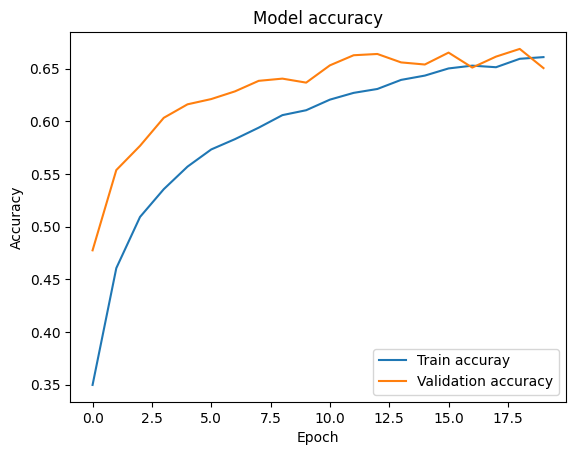

In [45]:
plt.plot(history.history['accuracy'], label='Train accuray')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [44]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6512 - loss: 1.0121


[1.0210784673690796, 0.6513000130653381]

In [52]:
predictions = model.predict(X_test[:10])
predicted_classes = predictions.argmax(axis=-1)
true_classes = y_test[:10].argmax(axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [53]:
predicted_classes

array([3, 8, 8, 0, 6, 6, 1, 2, 3, 1])

In [54]:
true_classes

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

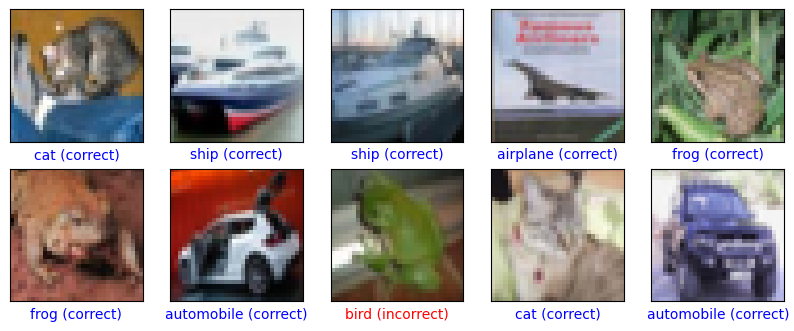

In [58]:
plt.figure(figsize=(10, 10))
for i in range(1, 11):
    plt.subplot(5, 5, i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i-1])
    color = 'blue' if predicted_classes[i-1] == true_classes[i - 1] else 'red'
    plt.xlabel(f"{class_names[predicted_classes[i-1]]} ({'correct' if color == 'blue' else 'incorrect'})", color = color)
plt.show()